In [112]:
import json

data_path = r"C:\Users\gac8\PycharmProjects\PSSearch\Gian_experimental\compare_methods05-13-H15'm'55's10.json"

with open(data_path, "r") as file:
    data = json.load(file)


results_by_method = data["results"]



In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def compare_distributions_histogram(
    datasets,
    bin_count=50,
    xlim=None,
    labels=None,
    title="Histogram Comparison",
    density=False,
    alpha=0.8,
    colors=None,
    logx=False,
    logy=False
):
    """
    Compare multiple distributions using side-by-side histograms.

    Parameters:
    - datasets: List of lists or arrays of numbers
    - bin_count: Number of bins to use (even for log scale)
    - xlim: Tuple (xmin, xmax) for x-axis limits; if None, auto-calculated
    - labels: List of labels for each dataset
    - title: Title of the plot
    - density: If True, plot probability densities instead of counts
    - alpha: Transparency of the histogram bars
    - colors: List of colors for the histograms
    - logx: If True, set x-axis to log scale (requires positive data)
    - logy: If True, set y-axis to log scale
    """
    datasets = [np.asarray(data) for data in datasets]
    
    if logx:
        datasets = [data[data > 0] for data in datasets]

    # Determine x-axis limits
    if xlim is None:
        xmin = min(data.min() for data in datasets)
        xmax = max(data.max() for data in datasets)
        xlim = (xmin, xmax)

    # Define bins
    if logx:
        bins = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), bin_count + 1)
    else:
        bins = np.linspace(xlim[0], xlim[1], bin_count + 1)

    # Histogram counts
    hists = [np.histogram(data, bins=bins, density=density)[0] for data in datasets]
    bin_centers = (bins[:-1] + bins[1:]) / 2
    width = np.diff(bins)

    num_datasets = len(datasets)
    offsets = np.linspace(-0.4, 0.4, num=num_datasets) * width[:, None]

    if labels is None:
        labels = [f"Data {i+1}" for i in range(num_datasets)]

    if colors is None:
        colors = [f"C{i}" for i in range(num_datasets)]

    # Plotting
    plt.figure(figsize=(10, 6))
    for i, hist in enumerate(hists):
        center_shift = offsets[:, i]
        plt.bar(bin_centers + center_shift, hist,
                width=width * (0.8 / num_datasets),
                label=labels[i],
                alpha=alpha,
                color=colors[i % len(colors)],
                edgecolor='black',
                align='center')

    plt.xlabel("Value (log scale)" if logx else "Value")
    plt.ylabel("Density" if density else "Count")
    plt.title(title)

    # Axis scaling
    ax = plt.gca()
    if logx:
        ax.set_xscale("log")
        ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
        ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1,
                                                     numticks=100, prune=None))
        ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    else:
        ax.set_xscale("linear")

    if logy:
        ax.set_yscale("log")

    plt.xlim(xlim)
    plt.legend()
    plt.grid(True, which='both' if logx or logy else 'major', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


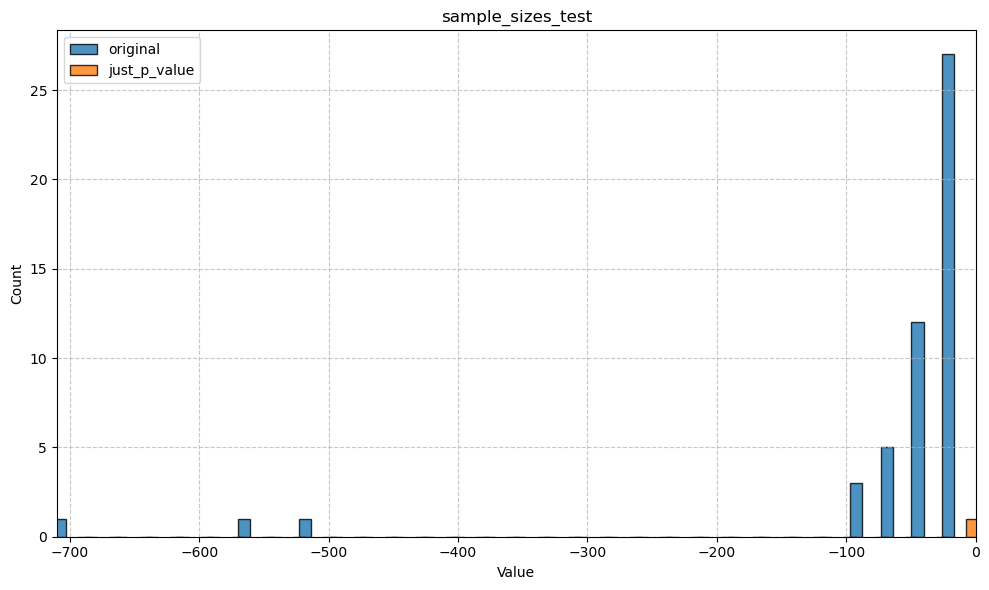

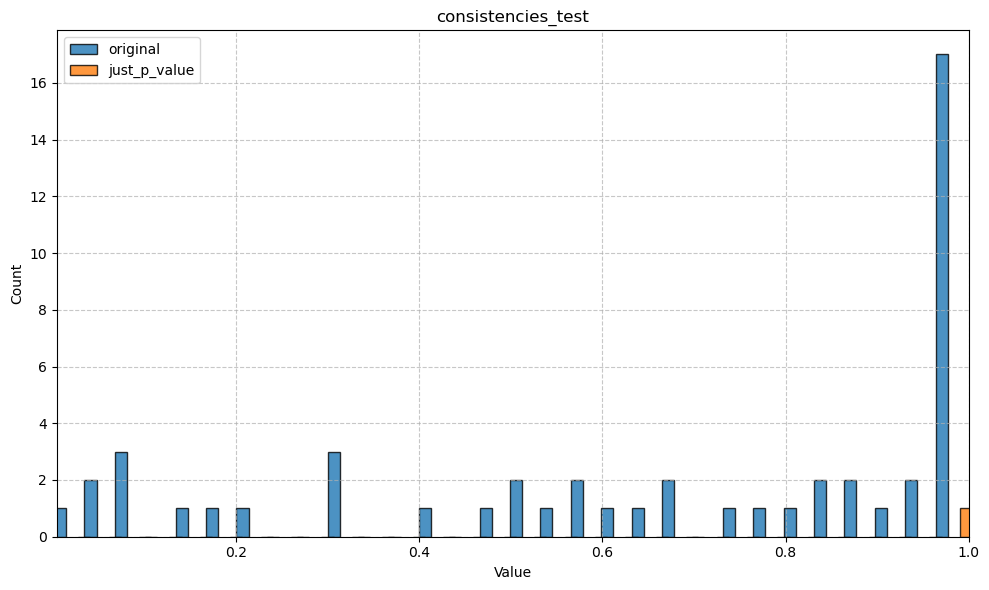

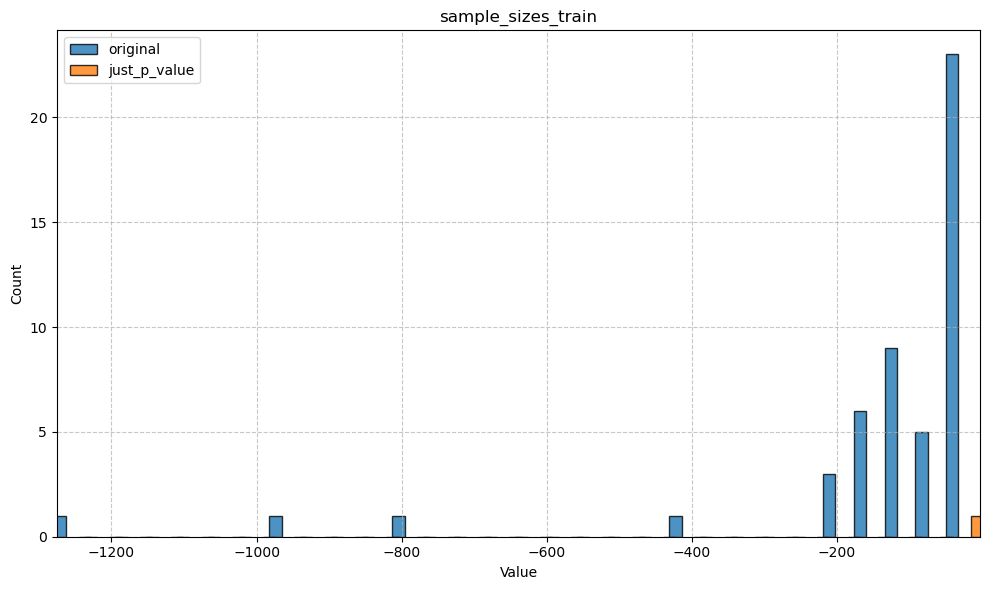

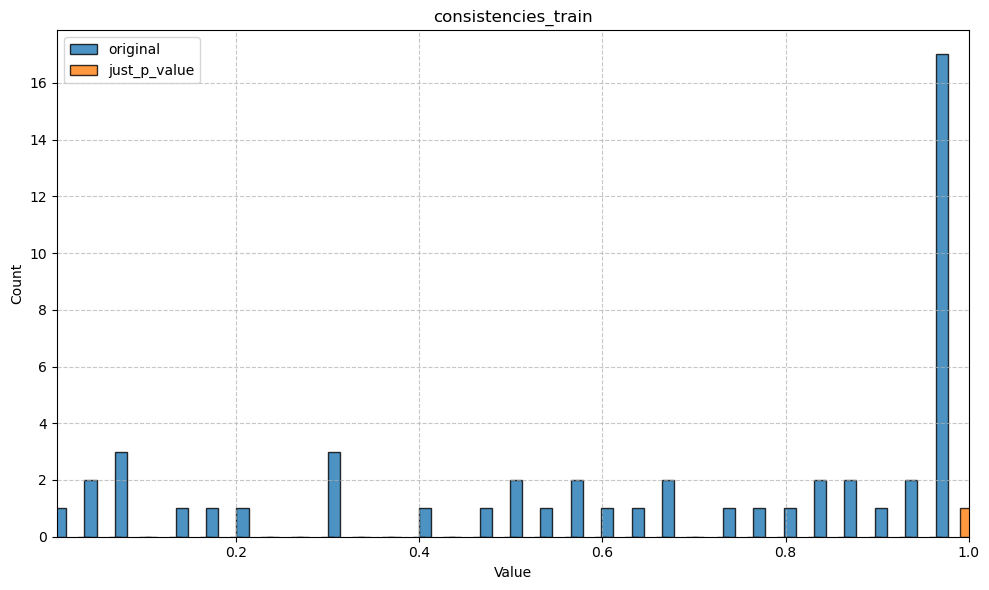

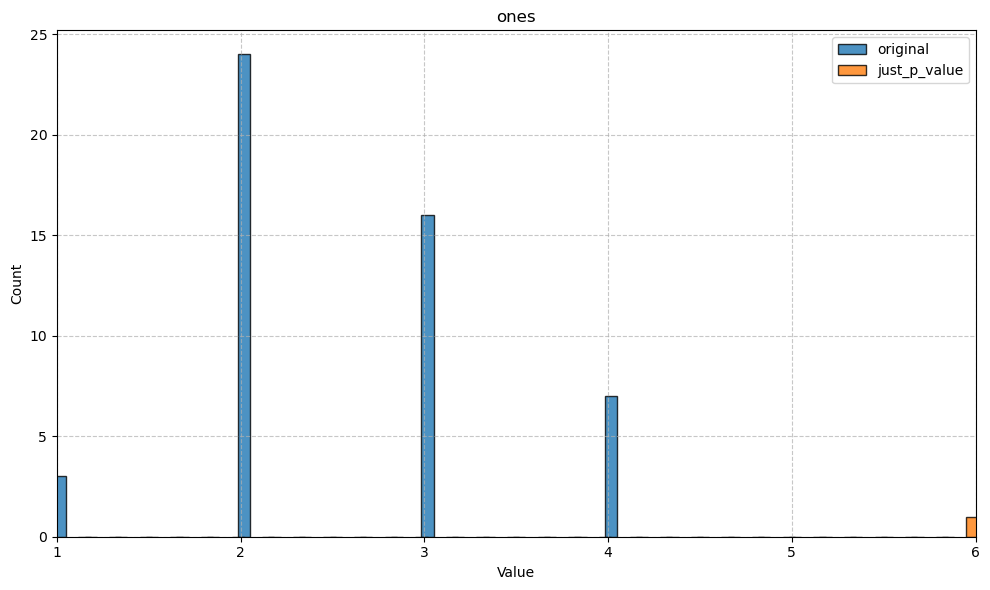

In [114]:
def compare_property(property_name):
    all_categories = [(item["method"], item["run_result"]) for item in results_by_method]
    
    all_lists = [numbers[property_name] for name, numbers in all_categories]
    
    category_names = [name for name, numbers in all_categories]
    
    
    
    compare_distributions_histogram(datasets=all_lists, title=property_name, labels=category_names, bin_count=30)
    
for property_name in ["sample_sizes_test", "consistencies_test", "sample_sizes_train", "consistencies_train", "ones"]:
    compare_property(property_name)

In [115]:
from PolishSystem.read_data import get_pRef_from_vectors

train_pRef = get_pRef_from_vectors(name_of_vectors_file=r"C:\Users\gac8\PycharmProjects\PSSearch\data\retail_forecasting\train_many_hot_vectors_250_qmc.csv",
                                          name_of_fitness_file=r"C:\Users\gac8\PycharmProjects\PSSearch\data\retail_forecasting\train_fitness_250_qmc.csv",
                                      column_in_fitness_file=2)

In [116]:
print(train_pRef.sample_size/4)

9198.5
